<a href="https://colab.research.google.com/github/dimakpa/ML_Projects/blob/main/%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D1%8B%D0%B9_SVM_%D1%80%D0%B0%D0%B7%D0%B4%D0%B5%D0%BB%D0%B8%D0%BC%D1%8B%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Простая задача по разделению двух видов жуков.

Подключаем библиотеки

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

Создаем обучающую выборку с тремя признаками

In [ ]:
x_train = [[10, 50], [20, 30], [25, 30], [20, 60], [15, 70], [40, 40], [30, 45], [20, 45], [40, 30], [7, 35]]
x_train = [x + [1] for x in x_train] # Признак нужен для смещения
y_train = [-1, 1, 1, -1, -1, 1, 1, -1, 1, -1] # Метки класса

Подключаем линейное ядро и находим вектора w по обучающей выборке

In [ ]:
clf = svm.SVC(kernel='linear') 
clf.fit(x_train, y_train) 

SVC(kernel='linear')

Делаем тоже самое, но используем другой класс, чтобы получить вектора в явном виде. LinerSVC может быть использован только для линейноразделимой выборки


In [ ]:
lin_clf = svm.LinearSVC()           # SVM для линейно разделимой выборки (используется для получения вектора w)
lin_clf.fit(x_train, y_train)       


LinearSVC()

С помощью clf мы будем получать список опорных векторов

In [ ]:
v = clf.support_vectors_

А с помощью lin_clf будем получать коэфициенты линейной модели в явном виде

In [ ]:
w = lin_clf.coef_[0]

In [ ]:
print(w, v, sep='\n')

[ 0.24372123 -0.13071443  0.01218606]
[[20. 45.  1.]
 [20. 30.  1.]
 [30. 45.  1.]]


Сделаем график для визуализации

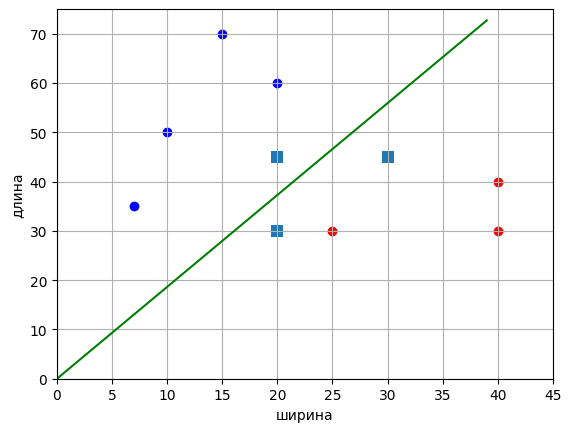

In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)
line_x = list(range(max(x_train[:, 0])))    # формирование графика разделяющей линии
line_y = [-x*w[0]/w[1] - w[2] for x in line_x]

x_0 = x_train[y_train == 1]                 # формирование точек для 1-го
x_1 = x_train[y_train == -1]                # и 2-го классов

plt.scatter(x_0[:, 0], x_0[:, 1], color='red')
plt.scatter(x_1[:, 0], x_1[:, 1], color='blue')
plt.scatter(v[:, 0], v[:, 1], s=70, edgecolor=None, linewidths=0, marker='s')
plt.plot(line_x, line_y, color='green')

plt.xlim([0, 45])
plt.ylim([0, 75])
plt.ylabel("длина")
plt.xlabel("ширина")
plt.grid(True)
plt.show()